In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ml_ver3.csv')
df.head()


,개업율,폐업율,개인점포_증감율,프랜차이즈_증감율,Index,Under40SalesRate,자치구,RentalRate,Gen
0,0.400000,0.333333,0.082713,-0.048972,1,0.971865,종로구,-0.059856,1
1,1.600000,-0.111111,0.097991,-0.058018,2,6.700351,종로구,0.126538,1
2,0.400000,0.777778,0.096135,-0.056919,3,2.144237,종로구,-0.083235,1
3,0.166667,2.000000,0.083367,-0.049267,4,-0.436084,종로구,0.481053,1
4,1.166667,1.000000,0.098655,-0.058301,5,7.508616,종로구,1.605556,1


In [3]:
df = df.rename(columns={'자치구': 'Region', 'Under40SalesRate': 'SalesRateUnder40', 'RentalRate': 'CostRate','프랜차이즈_증감율':'FranchiseRate','개인점포_증감율':'PriviateStoreRate','폐업율':'CloseRate','개업율':'OpenRate','gen':'Gentrification'})

In [4]:
mean_OpenRate = df['OpenRate'].mean()
mean_CloseRate = df['CloseRate'].mean()
mean_FranchiseRate= df['FranchiseRate'].mean()
mean_PriviateStoreRate= df['PriviateStoreRate'].mean()
mean_SalesRateUnder40= df['SalesRateUnder40'].mean()

전처리-OneHotEncoding

In [5]:
one_hot_encoded=pd.get_dummies(df['Region'],dtype=int)
one_hot_encoded



,금천구,중랑구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,노원구,...,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9665,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9666,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9667,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9668,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


전처리-표준화

In [6]:
merged_df=pd.concat([df, one_hot_encoded],axis=1)
merged_df

,OpenRate,CloseRate,PriviateStoreRate,FranchiseRate,Index,SalesRateUnder40,Region,CostRate,Gen,금천구,...,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구
0,0.400000,0.333333,0.082713,-0.048972,1,0.971865,종로구,-0.059856,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1.600000,-0.111111,0.097991,-0.058018,2,6.700351,종로구,0.126538,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.400000,0.777778,0.096135,-0.056919,3,2.144237,종로구,-0.083235,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0.166667,2.000000,0.083367,-0.049267,4,-0.436084,종로구,0.481053,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1.166667,1.000000,0.098655,-0.058301,5,7.508616,종로구,1.605556,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9665,NaN,NaN,NaN,NaN,9666,1.251625,강동구,-0.764967,1,0,...,0,0,0,0,0,0,0,0,0,0
9666,NaN,NaN,NaN,NaN,9667,1.251625,강동구,-0.796296,1,0,...,0,0,0,0,0,0,0,0,0,0
9667,NaN,NaN,NaN,NaN,9668,1.251625,강동구,-0.840000,1,0,...,0,0,0,0,0,0,0,0,0,0
9668,NaN,NaN,NaN,NaN,9669,1.251625,강동구,-0.731707,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
sampled_df = merged_df.sample(n=3000, random_state=42)
sampled_df

,OpenRate,CloseRate,PriviateStoreRate,FranchiseRate,Index,SalesRateUnder40,Region,CostRate,Gen,금천구,...,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구
5070,NaN,NaN,NaN,NaN,5071,1.251625,은평구,0.652174,0,0,...,0,0,0,0,0,0,0,1,0,0
487,-0.250000,0.6,0.210614,-0.077544,488,1.251625,용산구,-0.778035,0,0,...,0,0,0,0,0,0,1,0,0,0
1155,NaN,NaN,NaN,NaN,1156,1.251625,마포구,6.228571,0,0,...,0,0,0,0,0,0,0,0,0,0
4162,NaN,NaN,NaN,NaN,4163,1.251625,동대문구,0.280172,0,0,...,0,0,0,0,0,0,0,0,0,0
7356,NaN,NaN,NaN,NaN,7357,1.251625,서초구,-0.766247,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7880,NaN,NaN,NaN,NaN,7881,1.251625,서초구,-0.017857,0,0,...,1,0,0,0,0,0,0,0,0,0
4848,NaN,NaN,NaN,NaN,4849,1.251625,강북구,3.086957,0,0,...,0,0,0,0,0,0,0,0,0,0
8276,NaN,NaN,NaN,NaN,8277,1.251625,강남구,4.750000,0,0,...,0,0,0,0,0,0,0,0,0,0
2518,NaN,NaN,NaN,NaN,2519,1.251625,중구,0.335484,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
column_list = sampled_df.columns.tolist()
column_list

['OpenRate',
 'CloseRate',
 'PriviateStoreRate',
 'FranchiseRate',
 'Index',
 'SalesRateUnder40',
 'Region',
 'CostRate',
 'Gen',
 ' 금천구',
 ' 중랑구',
 '강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '노원구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구']

In [9]:
sample_df_hot_encoded=sampled_df[['종로구','중구','용산구','성동구','광진구','동대문구',' 중랑구','성북구','강북구','노원구','은평구','서대문구',
'마포구',
'양천구',
'강서구',
'구로구',
' 금천구',
'영등포구',
'동작구',
'관악구',
'서초구',
'강남구',
'송파구',
'강동구']]
sample_df_hot_encoded

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,노원구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
5070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
487,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4162,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4848,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2518,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
unique_values = sampled_df['Region'].unique()
unique_values

array(['은평구', '용산구', '마포구', '동대문구', '서초구', '광진구', '송파구', '강서구', '종로구',
       '강남구', '서대문구', ' 금천구', '관악구', '강북구', '성동구', '노원구', '성북구', '중구',
       '동작구', '영등포구', '구로구', '양천구', ' 중랑구', '강동구'], dtype=object)

In [11]:
from sklearn.preprocessing import StandardScaler
# 숫자형 데이터에 대해 표준화를 수행할 열 선택
numeric_columns = ['SalesRateUnder40','CostRate','OpenRate','CloseRate','PriviateStoreRate','FranchiseRate','Gen']

# 표준화를 위해 선택한 열 추출
numeric_data = sampled_df[numeric_columns]

# StandardScaler를 사용하여 표준화 수행
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numeric_data)

# 표준화된 데이터를 데이터프레임으로 변환
standardized_df = pd.DataFrame(standardized_data, columns=numeric_columns)
standardized_df['Index']=range(1, len(standardized_df)+1)
standardized_df

,SalesRateUnder40,CostRate,OpenRate,CloseRate,PriviateStoreRate,FranchiseRate,Gen,Index
0,0.000099,0.042961,NaN,NaN,NaN,NaN,-0.347358,1
1,0.000099,-0.557406,-0.064335,0.194563,1.493546,-1.543566,-0.347358,2
2,0.000099,2.383798,NaN,NaN,NaN,NaN,-0.347358,3
3,0.000099,-0.113196,NaN,NaN,NaN,NaN,-0.347358,4
4,0.000099,-0.552458,NaN,NaN,NaN,NaN,-0.347358,5
...,...,...,...,...,...,...,...,...
2995,0.000099,-0.238302,NaN,NaN,NaN,NaN,-0.347358,2996
2996,0.000099,1.065024,NaN,NaN,NaN,NaN,-0.347358,2997
2997,0.000099,1.763130,NaN,NaN,NaN,NaN,-0.347358,2998
2998,0.000099,-0.089978,NaN,NaN,NaN,NaN,-0.347358,2999


In [12]:
sample_df_hot_encoded['Index']=range(1, len(sample_df_hot_encoded) + 1)
sample_df_hot_encoded

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,노원구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,Index
5070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
487,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4162,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
7356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2996
4848,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2997
8276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2998
2518,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2999


전처리-결측치

In [44]:
merge_final=pd.merge(sample_df_hot_encoded,standardized_df,on='Index',how='inner')
merge_final

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,노원구,...,송파구,강동구,Index,SalesRateUnder40,CostRate,OpenRate,CloseRate,PriviateStoreRate,FranchiseRate,Gen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.000099,0.042961,NaN,NaN,NaN,NaN,-0.347358
1,0,0,1,0,0,0,0,0,0,0,...,0,0,2,0.000099,-0.557406,-0.064335,0.194563,1.493546,-1.543566,-0.347358
2,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0.000099,2.383798,NaN,NaN,NaN,NaN,-0.347358
3,0,0,0,0,0,1,0,0,0,0,...,0,0,4,0.000099,-0.113196,NaN,NaN,NaN,NaN,-0.347358
4,0,0,0,0,0,0,0,0,0,0,...,0,0,5,0.000099,-0.552458,NaN,NaN,NaN,NaN,-0.347358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,2996,0.000099,-0.238302,NaN,NaN,NaN,NaN,-0.347358
2996,0,0,0,0,0,0,0,0,1,0,...,0,0,2997,0.000099,1.065024,NaN,NaN,NaN,NaN,-0.347358
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,2998,0.000099,1.763130,NaN,NaN,NaN,NaN,-0.347358
2998,0,1,0,0,0,0,0,0,0,0,...,0,0,2999,0.000099,-0.089978,NaN,NaN,NaN,NaN,-0.347358


In [45]:
merge_final2=merge_final.drop(['Index'],axis=1)
merge_final2

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,노원구,...,강남구,송파구,강동구,SalesRateUnder40,CostRate,OpenRate,CloseRate,PriviateStoreRate,FranchiseRate,Gen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,0.042961,NaN,NaN,NaN,NaN,-0.347358
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.557406,-0.064335,0.194563,1.493546,-1.543566,-0.347358
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,2.383798,NaN,NaN,NaN,NaN,-0.347358
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0.000099,-0.113196,NaN,NaN,NaN,NaN,-0.347358
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.552458,NaN,NaN,NaN,NaN,-0.347358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.238302,NaN,NaN,NaN,NaN,-0.347358
2996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0.000099,1.065024,NaN,NaN,NaN,NaN,-0.347358
2997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0.000099,1.763130,NaN,NaN,NaN,NaN,-0.347358
2998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.089978,NaN,NaN,NaN,NaN,-0.347358


In [15]:
#결측치 확인
merge_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   종로구                3000 non-null   int32  
 1   중구                 3000 non-null   int32  
 2   용산구                3000 non-null   int32  
 3   성동구                3000 non-null   int32  
 4   광진구                3000 non-null   int32  
 5   동대문구               3000 non-null   int32  
 6    중랑구               3000 non-null   int32  
 7   성북구                3000 non-null   int32  
 8   강북구                3000 non-null   int32  
 9   노원구                3000 non-null   int32  
 10  은평구                3000 non-null   int32  
 11  서대문구               3000 non-null   int32  
 12  마포구                3000 non-null   int32  
 13  양천구                3000 non-null   int32  
 14  강서구                3000 non-null   int32  
 15  구로구                3000 non-null   int32  
 16   금천구               3000 

In [16]:
missing_values = merge_final2.isnull()
missing_values

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,노원구,...,강남구,송파구,강동구,SalesRateUnder40,CostRate,OpenRate,CloseRate,PriviateStoreRate,FranchiseRate,Gen
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
2996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
2997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
2998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False


In [17]:
fill_final_df = merge_final2.fillna(merge_final2.mean())

In [18]:
fill_final_df

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,노원구,...,강남구,송파구,강동구,SalesRateUnder40,CostRate,OpenRate,CloseRate,PriviateStoreRate,FranchiseRate,Gen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,0.042961,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.557406,-6.433460e-02,1.945631e-01,1.493546e+00,-1.543566,-0.347358
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,2.383798,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0.000099,-0.113196,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.552458,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.238302,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0.000099,1.065024,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0.000099,1.763130,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.089978,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358


In [19]:
# 결측치가 있는 행 확인
#missing_rows = fill_final_df.isna().any(axis=1)

# 결측치가 있는 열 확인
#missing_columns = fill_final_df.isna().any(axis=0)
#print("결측치가 있는 행:")
#print(fill_final_df[missing_rows])

#print("\n결측치가 있는 열:")
#print(fill_final_df.loc[:, missing_columns])

In [20]:
df_filled1 = fill_final_df.fillna({'OpenRate': mean_OpenRate})
df_filled1

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,노원구,...,강남구,송파구,강동구,SalesRateUnder40,CostRate,OpenRate,CloseRate,PriviateStoreRate,FranchiseRate,Gen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,0.042961,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.557406,-6.433460e-02,1.945631e-01,1.493546e+00,-1.543566,-0.347358
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,2.383798,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0.000099,-0.113196,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.552458,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.238302,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0.000099,1.065024,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0.000099,1.763130,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.089978,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358


In [21]:
df_filled2 = df_filled1.fillna({'CloseRate': mean_CloseRate})
df_filled2

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,노원구,...,강남구,송파구,강동구,SalesRateUnder40,CostRate,OpenRate,CloseRate,PriviateStoreRate,FranchiseRate,Gen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,0.042961,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.557406,-6.433460e-02,1.945631e-01,1.493546e+00,-1.543566,-0.347358
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,2.383798,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0.000099,-0.113196,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.552458,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.238302,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0.000099,1.065024,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0.000099,1.763130,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.089978,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358


In [22]:
df_filled2 = df_filled2.fillna({'FranchiseRate': mean_FranchiseRate})
df_filled2

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,노원구,...,강남구,송파구,강동구,SalesRateUnder40,CostRate,OpenRate,CloseRate,PriviateStoreRate,FranchiseRate,Gen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,0.042961,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.557406,-6.433460e-02,1.945631e-01,1.493546e+00,-1.543566,-0.347358
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,2.383798,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0.000099,-0.113196,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.552458,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.238302,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0.000099,1.065024,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0.000099,1.763130,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.089978,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358


In [23]:
df_filled2 = df_filled2.fillna({'PriviateStoreRate': mean_PriviateStoreRate})
df_filled2

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,노원구,...,강남구,송파구,강동구,SalesRateUnder40,CostRate,OpenRate,CloseRate,PriviateStoreRate,FranchiseRate,Gen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,0.042961,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.557406,-6.433460e-02,1.945631e-01,1.493546e+00,-1.543566,-0.347358
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,2.383798,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0.000099,-0.113196,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.552458,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.238302,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0.000099,1.065024,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0.000099,1.763130,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.089978,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358


In [24]:
df_filled2 = df_filled2.fillna({'SalesRateUnder40': mean_SalesRateUnder40})
df_filled2

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,노원구,...,강남구,송파구,강동구,SalesRateUnder40,CostRate,OpenRate,CloseRate,PriviateStoreRate,FranchiseRate,Gen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,0.042961,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.557406,-6.433460e-02,1.945631e-01,1.493546e+00,-1.543566,-0.347358
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,2.383798,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0.000099,-0.113196,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.552458,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.238302,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0.000099,1.065024,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0.000099,1.763130,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358
2998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.000099,-0.089978,-2.684056e-17,1.952040e-17,-2.928061e-17,0.000000,-0.347358


In [25]:
# 결측치가 있는 행 확인
missing_rows = df_filled2.isna().any(axis=1)

# 결측치가 있는 열 확인
missing_columns = df_filled2.isna().any(axis=0)

print("결측치가 있는 행:")
print(df_filled2[missing_rows])

print("\n결측치가 있는 열:")
print(df_filled2.loc[:, missing_columns])

결측치가 있는 행:
Empty DataFrame
Columns: [종로구, 중구, 용산구, 성동구, 광진구, 동대문구,  중랑구, 성북구, 강북구, 노원구, 은평구, 서대문구, 마포구, 양천구, 강서구, 구로구,  금천구, 영등포구, 동작구, 관악구, 서초구, 강남구, 송파구, 강동구, SalesRateUnder40, CostRate, OpenRate, CloseRate, PriviateStoreRate, FranchiseRate, Gen]
Index: []

[0 rows x 31 columns]

결측치가 있는 열:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[3000 rows x 0 columns]


In [26]:
df_filled2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   종로구                3000 non-null   int32  
 1   중구                 3000 non-null   int32  
 2   용산구                3000 non-null   int32  
 3   성동구                3000 non-null   int32  
 4   광진구                3000 non-null   int32  
 5   동대문구               3000 non-null   int32  
 6    중랑구               3000 non-null   int32  
 7   성북구                3000 non-null   int32  
 8   강북구                3000 non-null   int32  
 9   노원구                3000 non-null   int32  
 10  은평구                3000 non-null   int32  
 11  서대문구               3000 non-null   int32  
 12  마포구                3000 non-null   int32  
 13  양천구                3000 non-null   int32  
 14  강서구                3000 non-null   int32  
 15  구로구                3000 non-null   int32  
 16   금천구               3000 

In [27]:
# 결측치가 있는 행 확인
missing_rows=df_filled2.isnull().sum()
missing_rows

종로구                  0
중구                   0
용산구                  0
성동구                  0
광진구                  0
동대문구                 0
 중랑구                 0
성북구                  0
강북구                  0
노원구                  0
은평구                  0
서대문구                 0
마포구                  0
양천구                  0
강서구                  0
구로구                  0
 금천구                 0
영등포구                 0
동작구                  0
관악구                  0
서초구                  0
강남구                  0
송파구                  0
강동구                  0
SalesRateUnder40     0
CostRate             0
OpenRate             0
CloseRate            0
PriviateStoreRate    0
FranchiseRate        0
Gen                  0
dtype: int64

전처리-정규화

In [28]:
from sklearn.preprocessing import MinMaxScaler

# 정규화할 열을 선택
numeric_columns2 = ['SalesRateUnder40',	'CostRate', 'OpenRate', 'CloseRate',	'PriviateStoreRate',	'FranchiseRate','Gen']

# MinMax 객체 생성
scaler2 = MinMaxScaler()

# 선택한 열에 대해서만 정규화 수행
df_filled2[numeric_columns2] = scaler2.fit_transform(df_filled2[numeric_columns2])
df_filled2

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,노원구,...,강남구,송파구,강동구,SalesRateUnder40,CostRate,OpenRate,CloseRate,PriviateStoreRate,FranchiseRate,Gen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.051302,0.040004,0.215125,0.232652,0.420699,0.531016,0.0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.051302,0.005374,0.205128,0.266667,0.757992,0.170479,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.051302,0.175026,0.215125,0.232652,0.420699,0.531016,0.0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0.051302,0.030997,0.215125,0.232652,0.420699,0.531016,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.051302,0.005660,0.215125,0.232652,0.420699,0.531016,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.051302,0.023781,0.215125,0.232652,0.420699,0.531016,0.0
2996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0.051302,0.098958,0.215125,0.232652,0.420699,0.531016,0.0
2997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0.051302,0.139225,0.215125,0.232652,0.420699,0.531016,0.0
2998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.051302,0.032336,0.215125,0.232652,0.420699,0.531016,0.0


Linear Regression

In [29]:
from sklearn.model_selection import cross_val_score

y_target=df_filled2['Gen']
X_data=df_filled2.drop(['Gen'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

#선형회귀 OLS로 학습/예측/평가 수행
lr=LinearRegression()
lr.fit(X_train, y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print("MSE: {0:3f}, RMSE:{1:.3F}".format(mse,rmse))
print('R2 score : {0:.10f}'.format(r2_score(y_test,y_preds)))

neg_mse_scores=cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 folds individual Negative MSE scores:',np.round(neg_mse_scores,2))
print('5 folds individual RMSE scores:',np.round(rmse_scores,2))
print('5 folds average RMSE: {0:.7f} '.format(avg_rmse))

coeff=pd.Series(data=np.round(lr.coef_,5), index=X_data.columns)
coeff.sort_values(ascending=False)


MSE: 0.000000, RMSE:0.000
R2 score : 1.0000000000
5 folds individual Negative MSE scores: [-0. -0. -0. -0. -0.]
5 folds individual RMSE scores: [0. 0. 0. 0. 0.]
5 folds average RMSE: 0.0000000 


종로구                  0.86224
영등포구                 0.86224
강동구                  0.86224
PriviateStoreRate    0.00000
CloseRate           -0.00000
OpenRate            -0.00000
CostRate            -0.00000
SalesRateUnder40    -0.00000
FranchiseRate        0.00000
노원구                 -0.13776
서초구                 -0.13776
용산구                 -0.13776
성동구                 -0.13776
광진구                 -0.13776
동대문구                -0.13776
 중랑구                -0.13776
성북구                 -0.13776
송파구                 -0.13776
강남구                 -0.13776
관악구                 -0.13776
은평구                 -0.13776
동작구                 -0.13776
강북구                 -0.13776
 금천구                -0.13776
중구                  -0.13776
강서구                 -0.13776
양천구                 -0.13776
마포구                 -0.13776
서대문구                -0.13776
구로구                 -0.13776
dtype: float64

Correlation

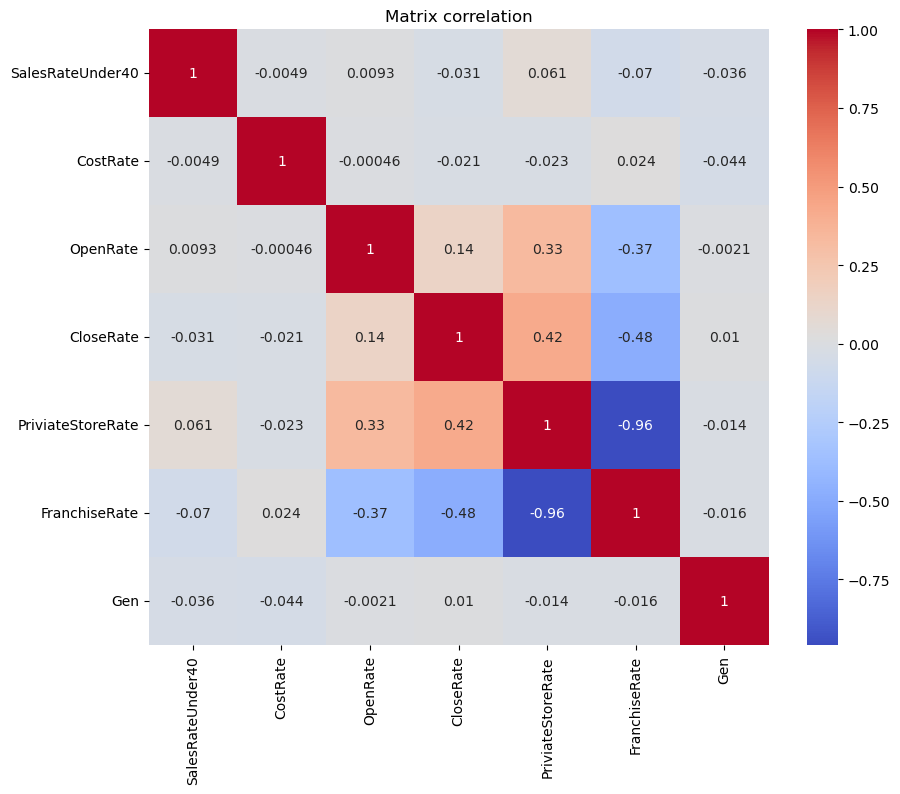

In [30]:
summary = df_filled2.describe()
correlation_df=df_filled2.drop(['용산구','강남구','중구','영등포구','종로구','마포구','광진구','서초구','송파구','관악구',' 금천구','성동구','강동구','서대문구','양천구','구로구','동작구','강서구','노원구','성북구','동대문구','강북구','은평구',' 중랑구'],axis=1)

# Matrice correlation
correlation_matrix = correlation_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrix correlation")
plt.show()


Ridge Regression

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from math import sqrt
alpha_values = [0.07, 0.1, 0.5, 1, 3]

for alpha in alpha_values:
    # Initialize the Lasso model with the current alpha
    ridge_model = Ridge(alpha=alpha)

    # Train the model
    ridge_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = ridge_model.predict(X_test)

    # Print the coefficients and intercept
    print('Coefficients:',alpha)
    for feature, coefficient in zip(X_data.columns, ridge_model.coef_):
        print(f'{feature}: {coefficient}')
    print(f'Intercept: {ridge_model.intercept_}\n')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)  # Calculate R-squared score
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')


Coefficients: 0.07
종로구: 0.8747866079961932
중구: -0.1247226784210662
용산구: -0.12469133756287884
성동구: -0.1246774209886412
광진구: -0.12469181192643103
동대문구: -0.12471928067705015
 중랑구: -0.12451496534398421
성북구: -0.12454291579149998
강북구: -0.12467838526491161
노원구: -0.12430421321929015
은평구: -0.12457658784447681
서대문구: -0.1245522124824058
마포구: -0.12472504467017417
양천구: -0.12447298362717654
강서구: -0.12445050207542668
구로구: -0.12455358146986742
 금천구: -0.12443544938812845
영등포구: 0.874378732371044
동작구: -0.12460414662196756
관악구: -0.1247093649740661
서초구: -0.12473718697112549
강남구: -0.1247461952346106
송파구: -0.12468317736849074
강동구: 0.8676241015642301
SalesRateUnder40: -0.00028823397518038386
CostRate: -0.00027829607764701353
OpenRate: 3.0585938144998785e-05
CloseRate: -0.00012080544697578271
PriviateStoreRate: -0.001328421090322023
FranchiseRate: -0.0012692096854814525
Intercept: 0.12605974221066307

Coefficients: 0.1
종로구: 0.8746958821426539
중구: -0.12460568421028081
용산구: -0.12456152153468161
성동구: -0.124540676

Lasso Regression

In [32]:
from sklearn.linear_model import Lasso, ElasticNet

alpha_values = [0.07, 0.1, 0.5, 1, 3]

for alpha in alpha_values:
    # Initialize the Lasso model with the current alpha
    lasso_model = Lasso(alpha=alpha)

    # Train the model
    lasso_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lasso_model.predict(X_test)

    # Print the coefficients and intercept
    print('Coefficients:',alpha)
    for feature, coefficient in zip(X_data.columns, lasso_model.coef_):
        print(f'{feature}: {coefficient}')
    print(f'Intercept: {lasso_model.intercept_}\n')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)  # Calculate R-squared score
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

Coefficients: 0.07
종로구: 0.0
중구: -0.0
용산구: -0.0
성동구: -0.0
광진구: -0.0
동대문구: -0.0
 중랑구: -0.0
성북구: -0.0
강북구: -0.0
노원구: -0.0
은평구: -0.0
서대문구: -0.0
마포구: -0.0
양천구: -0.0
강서구: -0.0
구로구: -0.0
 금천구: -0.0
영등포구: 0.0
동작구: -0.0
관악구: -0.0
서초구: -0.0
강남구: -0.0
송파구: -0.0
강동구: 0.0
SalesRateUnder40: -0.0
CostRate: -0.0
OpenRate: 0.0
CloseRate: 0.0
PriviateStoreRate: -0.0
FranchiseRate: -0.0
Intercept: 0.10857142857142857

Coefficients: 0.1
종로구: 0.0
중구: -0.0
용산구: -0.0
성동구: -0.0
광진구: -0.0
동대문구: -0.0
 중랑구: -0.0
성북구: -0.0
강북구: -0.0
노원구: -0.0
은평구: -0.0
서대문구: -0.0
마포구: -0.0
양천구: -0.0
강서구: -0.0
구로구: -0.0
 금천구: -0.0
영등포구: 0.0
동작구: -0.0
관악구: -0.0
서초구: -0.0
강남구: -0.0
송파구: -0.0
강동구: 0.0
SalesRateUnder40: -0.0
CostRate: -0.0
OpenRate: 0.0
CloseRate: 0.0
PriviateStoreRate: -0.0
FranchiseRate: -0.0
Intercept: 0.10857142857142857

Coefficients: 0.5
종로구: 0.0
중구: -0.0
용산구: -0.0
성동구: -0.0
광진구: -0.0
동대문구: -0.0
 중랑구: -0.0
성북구: -0.0
강북구: -0.0
노원구: -0.0
은평구: -0.0
서대문구: -0.0
마포구: -0.0
양천구: -0.0
강서구: -0.0
구로구: -0.0
 금천구: -0.0
영등포구:

XGBoost Regression

In [33]:
!pip3 install cmake

In [34]:
!pip3 install xgboost

In [35]:
from math import sqrt  # Import sqrt for RMSE calculation
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    objective='reg:squarederror',  # Specify the objective for regression
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)  # Calculate RMSE from MSE
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared score: {r2}\n')

# Optionally, you can also access feature importances
feature_importances = xgb_model.feature_importances_
print('Feature Importances:')
for feature, importance in zip(X_data.columns, feature_importances):
    print(f'{feature}: {importance}')

Mean Squared Error: 1.1526800326494044e-09
Root Mean Squared Error: 3.395114184603228e-05
R-squared score: 0.9999999877911627

Feature Importances:
종로구: 0.6091272234916687
중구: 0.0
용산구: 0.0
성동구: 0.0
광진구: 0.0
동대문구: 0.0
 중랑구: 0.0
성북구: 0.0
강북구: 0.0
노원구: 0.0
은평구: 0.0
서대문구: 0.0
마포구: 0.0
양천구: 0.0
강서구: 0.0
구로구: 0.0
 금천구: 0.0
영등포구: 0.35094165802001953
동작구: 0.0
관악구: 0.0
서초구: 0.0
강남구: 0.0
송파구: 0.0
강동구: 0.03993114084005356
SalesRateUnder40: 0.0
CostRate: 0.0
OpenRate: 0.0
CloseRate: 0.0
PriviateStoreRate: 0.0
FranchiseRate: 0.0


RandomForest

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [42]:
# RandomForestRegressor 모델 초기화
model = RandomForestRegressor()

# 모델 학습
model.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MSE:", mse)
print("R2 Score:", r2)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

RMSE: 0.0
MSE: 0.0
R2 Score: 1.0
Accuracy: 1.0


DecisionTree

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=42)

# 모델 학습
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=['Not Gentrified', 'Gentrified'])
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', ' 중랑구', '성북구', '강북구', '노원구',
       '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', ' 금천구', '영등포구', '동작구', '관악구',
       '서초구', '강남구', '송파구', '강동구', 'SalesRateUnder40', 'CostRate', 'OpenRate',
       'CloseRate', 'PriviateStoreRate', 'FranchiseRate'],
      dtype='object') instead.

<Figure size 2000x1000 with 0 Axes>